以7号车为例，用放电行驶片段计算RDR
- 读取放电片段原始数据和记录数据
- 计算实时RDR
- 用新的画图思路，画图验证

In [1]:
from pd_func import *

pd.set_option("display.max_rows()",100)
pd.set_option("display.max_columns()",100)

# 7号车

In [2]:
df_run_V7=pd.read_pickle("df_run_V7.pickle")
record_run_V7=pd.read_pickle("record_run_V7.pickle")
record_run_V7

,start_time,start_soc,start_mileage,start_t_volt,start_max_temp,start_min_temp,end_time,end_soc,end_mileage,end_t_volt,end_max_temp,end_min_temp,delta_time,delta_soc,delta_mileage,delta_t_volt,delta_max_temp,delta_min_temp
1,2018-05-07T10:39:05.000000000,59.0,2524.0,328.200012,26.0,20.0,2018-05-07T10:50:55.000000000,57.0,2527.0,327.899994,26.0,20.0,0 days 00:11:50,-2.0,3.0,-0.300018,0.0,0.0
2,2018-05-07T14:34:55.000000000,100.0,2527.0,345.0,26.0,20.0,2018-05-08T00:17:56.000000000,43.0,2627.0,327.399994,22.0,16.0,0 days 09:43:01,-57.0,100.0,-17.600006,-4.0,-4.0
3,2018-05-08T05:27:31.000000000,99.0,2627.0,333.899994,23.0,17.0,2018-05-08T10:52:24.000000000,33.0,2748.0,326.600006,24.0,18.0,0 days 05:24:53,-66.0,121.0,-7.299988,1.0,1.0
4,2018-05-08T15:18:03.000000000,87.0,2748.0,334.700012,27.0,21.0,2018-05-08T15:43:51.000000000,85.0,2752.0,332.5,27.0,21.0,0 days 00:25:48,-2.0,4.0,-2.200012,0.0,0.0
5,2018-05-08T16:28:01.000000000,94.0,2752.0,335.100006,27.0,21.0,2018-05-08T23:05:02.000000000,27.0,2873.0,324.899994,26.0,20.0,0 days 06:37:01,-67.0,121.0,-10.200012,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,2019-01-13T19:36:55.000000000,99.0,51825.0,334.799988,26.0,10.0,2019-01-13T23:09:26.000000000,32.0,51907.0,326.0,20.0,5.0,0 days 03:32:31,-67.0,82.0,-8.799988,-6.0,-5.0
654,2019-01-14T00:27:51.000000000,95.0,51907.0,334.399994,25.0,8.0,2019-01-14T16:38:33.000000000,26.0,51996.0,329.700012,14.0,1.0,0 days 16:10:42,-69.0,89.0,-4.699982,-11.0,-7.0
655,2019-01-14T17:21:14.000000000,77.0,51996.0,334.200012,21.0,7.0,2019-01-15T06:32:49.000000000,52.0,52027.0,326.5,10.0,-2.0,0 days 13:11:35,-25.0,31.0,-7.700012,-11.0,-9.0
656,2019-01-15T10:33:49.000000000,99.0,52027.0,334.600006,19.0,4.0,2019-03-27T17:07:53.000000000,55.0,52078.0,326.799988,20.0,2.0,71 days 06:34:04,-44.0,51.0,-7.800018,1.0,-2.0


In [3]:
len(record_run_V7[record_run_V7["delta_mileage"]>100])

100

In [4]:
useful_frag=record_run_V7[record_run_V7["delta_mileage"]>100].index.values
run_frag_i=df_run_V7[df_run_V7["run_frag"]==useful_frag[0]]
run_frag_i

,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,charge_frag,power,time_diff,run_energy,cum_run_energy,range,range_diff,cum_mileage,cum_EC
4649,1.0,3.0,9.9,2627.0,333.899994,4.7,99.0,3.421,3.330,23.0,17.0,2018-05-08 05:27:31,3,-1,1.56933,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN
4650,1.0,3.0,5.0,2627.0,333.899994,4.1,99.0,3.414,3.330,23.0,17.0,2018-05-08 05:27:41,3,-1,1.36899,10.0,0.003803,0.003803,0.0,0.0,0.0,0.130757
4651,1.0,3.0,17.1,2627.0,333.600006,1.9,99.0,3.399,3.327,23.0,17.0,2018-05-08 05:27:51,3,-1,0.63384,10.0,0.001761,0.005563,0.0,0.0,0.0,0.130774
4652,1.0,3.0,18.6,2627.0,333.100006,1.5,99.0,3.387,3.324,23.0,17.0,2018-05-08 05:28:01,3,-1,0.49965,10.0,0.001388,0.006951,0.0,0.0,0.0,0.130788
4653,1.0,3.0,23.1,2627.0,332.500000,12.9,99.0,3.375,3.321,23.0,17.0,2018-05-08 05:28:11,3,-1,4.28925,10.0,0.011915,0.018866,0.0,0.0,0.0,0.130907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,2018-05-08 10:51:44,3,-1,0.55505,10.0,0.001542,17.208581,121.0,0.0,121.0,0.137016
6502,1.0,3.0,1.9,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,2018-05-08 10:51:54,3,-1,0.55505,10.0,0.001542,17.210123,121.0,0.0,121.0,0.137023
6503,1.0,3.0,1.4,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,2018-05-08 10:52:04,3,-1,0.55505,10.0,0.001542,17.211665,121.0,0.0,121.0,0.137029
6504,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,2018-05-08 10:52:14,3,-1,0.55505,10.0,0.001542,17.213207,121.0,0.0,121.0,0.137036


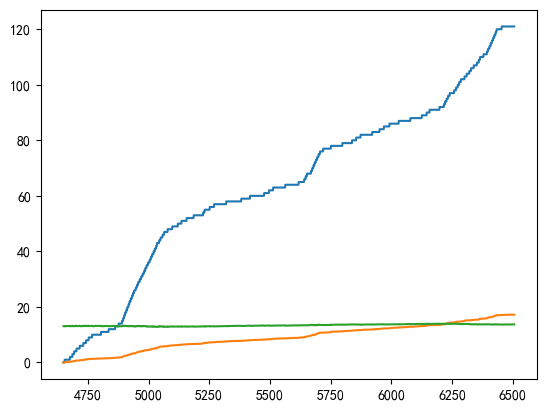

In [5]:
plt.plot(run_frag_i["cum_mileage"])
plt.plot(run_frag_i["cum_run_energy"])
plt.plot(run_frag_i["cum_EC"]*100)

In [6]:
record_charge_df_V7=pd.read_pickle("record_charge_df_V7.pickle")
Q_data=record_charge_df_V7.loc[:,["end_time","end_mileage","moving_ave_Q_max"]]
Q_data["end_time"].values[0]

numpy.datetime64('2018-05-06T13:14:23.000000000')

[26.0996836 26.0996836 26.0996836 ... 26.0996836 26.0996836 26.0996836]


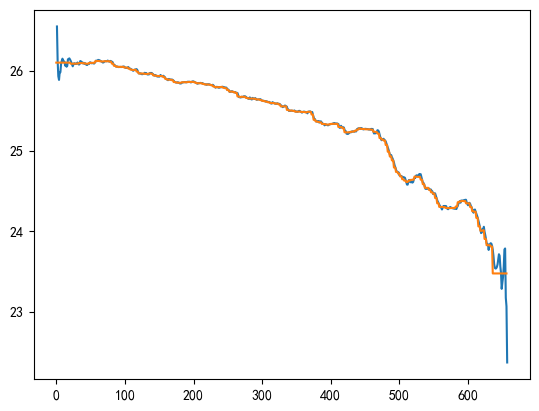

In [7]:
#用LGB拟合一个Q_max的曲线

record_charge_df_V7=pd.read_pickle("record_charge_df_V7.pickle")
Q_data=record_charge_df_V7.loc[:,["end_time","end_mileage","moving_ave_Q_max"]]
Q_data["end_time"]=Q_data["end_time"].astype(np.float64)
Q_data["end_mileage"]=Q_data["end_mileage"].astype(np.float64)
Q_data["moving_ave_Q_max"]=Q_data["moving_ave_Q_max"]*(-1)

import lightgbm as lgb
X=Q_data.loc[:,["end_time","end_mileage"]]
Y=Q_data["moving_ave_Q_max"]
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X, Y)
Y1=lgb_model.predict(X)
plt.plot(Y)
plt.plot(Y1)

#输入测试数据（一组放电数据），输出一组Q_max
run_frag_i["time"]=run_frag_i["time"].values.astype(np.float64)
x_test=run_frag_i.loc[:,["time","mileage"]]
y_test=lgb_model.predict(x_test)
print(y_test)

In [8]:
run_frag_i

,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,charge_frag,power,time_diff,run_energy,cum_run_energy,range,range_diff,cum_mileage,cum_EC
4649,1.0,3.0,9.9,2627.0,333.899994,4.7,99.0,3.421,3.330,23.0,17.0,1.525757e+18,3,-1,1.56933,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN
4650,1.0,3.0,5.0,2627.0,333.899994,4.1,99.0,3.414,3.330,23.0,17.0,1.525757e+18,3,-1,1.36899,10.0,0.003803,0.003803,0.0,0.0,0.0,0.130757
4651,1.0,3.0,17.1,2627.0,333.600006,1.9,99.0,3.399,3.327,23.0,17.0,1.525757e+18,3,-1,0.63384,10.0,0.001761,0.005563,0.0,0.0,0.0,0.130774
4652,1.0,3.0,18.6,2627.0,333.100006,1.5,99.0,3.387,3.324,23.0,17.0,1.525757e+18,3,-1,0.49965,10.0,0.001388,0.006951,0.0,0.0,0.0,0.130788
4653,1.0,3.0,23.1,2627.0,332.500000,12.9,99.0,3.375,3.321,23.0,17.0,1.525757e+18,3,-1,4.28925,10.0,0.011915,0.018866,0.0,0.0,0.0,0.130907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,1.525777e+18,3,-1,0.55505,10.0,0.001542,17.208581,121.0,0.0,121.0,0.137016
6502,1.0,3.0,1.9,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,1.525777e+18,3,-1,0.55505,10.0,0.001542,17.210123,121.0,0.0,121.0,0.137023
6503,1.0,3.0,1.4,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,1.525777e+18,3,-1,0.55505,10.0,0.001542,17.211665,121.0,0.0,121.0,0.137029
6504,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,1.525777e+18,3,-1,0.55505,10.0,0.001542,17.213207,121.0,0.0,121.0,0.137036


In [37]:
i=3
run_frag_i=df_run_V7[df_run_V7["run_frag"]==i]
run_frag_i["soc"].values[0]
run_frag_i

,status,c_stat,speed,mileage,t_volt,t_current,soc,max_cell_volt,min_cell_volt,max_temp,min_temp,time,run_frag,charge_frag,power,time_diff,run_energy,cum_run_energy,range,range_diff,cum_mileage,cum_EC
4649,1.0,3.0,9.9,2627.0,333.899994,4.7,99.0,3.421,3.330,23.0,17.0,2018-05-08 05:27:31,3,-1,1.56933,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN
4650,1.0,3.0,5.0,2627.0,333.899994,4.1,99.0,3.414,3.330,23.0,17.0,2018-05-08 05:27:41,3,-1,1.36899,10.0,0.003803,0.003803,0.0,0.0,0.0,0.130757
4651,1.0,3.0,17.1,2627.0,333.600006,1.9,99.0,3.399,3.327,23.0,17.0,2018-05-08 05:27:51,3,-1,0.63384,10.0,0.001761,0.005563,0.0,0.0,0.0,0.130774
4652,1.0,3.0,18.6,2627.0,333.100006,1.5,99.0,3.387,3.324,23.0,17.0,2018-05-08 05:28:01,3,-1,0.49965,10.0,0.001388,0.006951,0.0,0.0,0.0,0.130788
4653,1.0,3.0,23.1,2627.0,332.500000,12.9,99.0,3.375,3.321,23.0,17.0,2018-05-08 05:28:11,3,-1,4.28925,10.0,0.011915,0.018866,0.0,0.0,0.0,0.130907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,2018-05-08 10:51:44,3,-1,0.55505,10.0,0.001542,17.208581,121.0,0.0,121.0,0.137016
6502,1.0,3.0,1.9,2748.0,326.500000,1.7,33.0,3.268,3.249,24.0,18.0,2018-05-08 10:51:54,3,-1,0.55505,10.0,0.001542,17.210123,121.0,0.0,121.0,0.137023
6503,1.0,3.0,1.4,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,2018-05-08 10:52:04,3,-1,0.55505,10.0,0.001542,17.211665,121.0,0.0,121.0,0.137029
6504,1.0,3.0,0.0,2748.0,326.500000,1.7,33.0,3.270,3.249,24.0,18.0,2018-05-08 10:52:14,3,-1,0.55505,10.0,0.001542,17.213207,121.0,0.0,121.0,0.137036


In [49]:
def cal_RDR(i=3):
    """
    计算RDE
    计算EC
    计算RDR
    """
    out_put_i=pd.DataFrame()
    #计算RDE，读取record_charge_V7的滑动平均Q_max，这是一个时间序列，用于取得对应时间的最大充电能量
    #利用最大充电能量*开始SOC，得到一个放电片段开始的RDE
    run_frag_i=df_run_V7[df_run_V7["run_frag"]==i]
    run_frag_i["time"]=run_frag_i["time"].values.astype(np.float64)
    x_test=run_frag_i.loc[:,["time","mileage"]]
    y_test=lgb_model.predict(x_test)
    out_put_i["Q_max"]=y_test
    out_put_i["RDE"]=out_put_i["Q_max"].values[0]*run_frag_i["soc"].values[0]/100-run_frag_i["cum_run_energy"].values#这种相对平滑一点
#     out_put_i["RDE"]=28-run_frag_i["cum_run_energy"].values#不考虑SOH就直接用额定容量28
    #读取df_run_V7里面的能耗，计算滑动平均值EC
    out_put_i["cum_EC"]=run_frag_i["cum_EC"].values
    out_put_i.loc[0,"cum_EC"]=run_frag_i["cum_EC"].values[1]
    #用RDE/EC=RDR
    out_put_i["RDR"]=out_put_i["RDE"]/out_put_i["cum_EC"]
    #真实RDR加上RDR1或者RDR2的最大值减去range
    out_put_i["RDR-real_range"]=out_put_i["RDR"].values[1]-run_frag_i["range"].values
    from sklearn.metrics import mean_absolute_error
    MAE=mean_absolute_error(out_put_i["RDR"].values,out_put_i["RDR-real_range"].values)
    plt.figure()
    plt.plot(out_put_i["RDR"],label="RDR")
    plt.plot(out_put_i["RDR-real_range"],label="RDR-real_range")
    plt.legend()
    plt.title("frag_{},MAE_{}".format(i,MAE))
    print(out_put_i["Q_max"].values[0])
    return out_put_i

26.099683604209144


,Q_max,RDE,cum_EC,RDR,RDR-real_range
0,26.099684,25.838687,0.130757,197.609128,197.580048
1,26.099684,25.834884,0.130757,197.580045,197.580048
2,26.099684,25.833123,0.130774,197.539981,197.580048
3,26.099684,25.831735,0.130788,197.508406,197.580048
4,26.099684,25.819821,0.130907,197.237627,197.580048
...,...,...,...,...,...
1852,26.099684,8.630105,0.137016,62.986328,76.580048
1853,26.099684,8.628564,0.137023,62.971869,76.580048
1854,26.099684,8.627022,0.137029,62.957411,76.580048
1855,26.099684,8.625480,0.137036,62.942955,76.580048


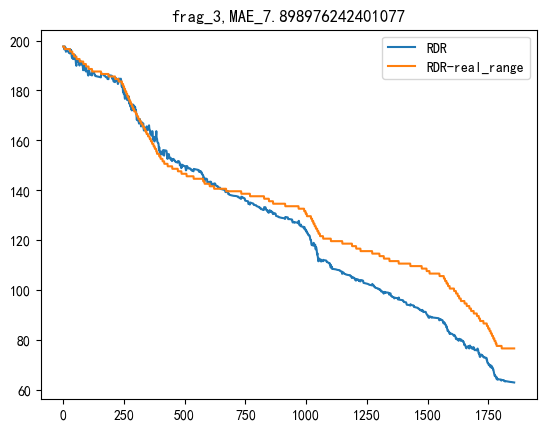

In [50]:
out_put_i=cal_RDR(i=3)
out_put_i

26.099683604209144
26.099683604209144
26.099683604209144
26.099683604209144
26.099683604209144
26.099683604209144
26.099683604209144
26.099683604209144
26.08613641440228
26.08613641440228
26.086993845455723
26.088000862483508
26.094118879804324
26.094118879804324
26.09664621231454
26.098262946286663
26.11823950047886
26.120333151802907
26.120333151802907
26.117584784017552
26.113663443732428
26.11644943070555
26.117485762275336
26.117485762275336
26.086790964434385
26.049814463337565
26.04628441737101
26.047449183092283
26.038206607968974
26.02542357889254
26.02542357889254
26.008248718414276
25.987967854487618
25.96414001637923
25.96414001637923
25.96343791848694
25.95940901408046
25.963849759919967
25.963849759919967
25.961244978734733
25.942037948067068
25.93676383630089
25.932205515940908
25.932205515940908
25.932205515940908
25.918587279889877
25.89581317944516
25.887381698907756
25.881301341674074
25.8530104570601
25.848784296252546
25.85556015958156
25.856347809930636
25.8596372

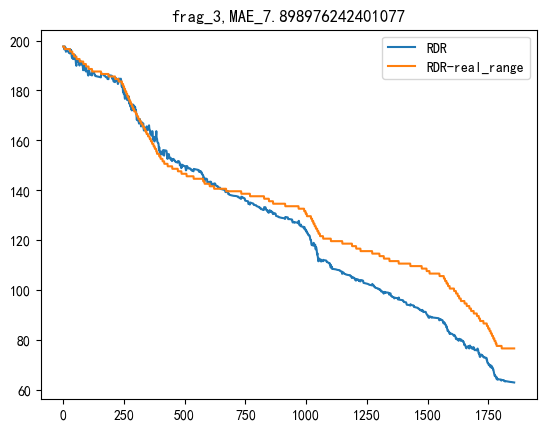

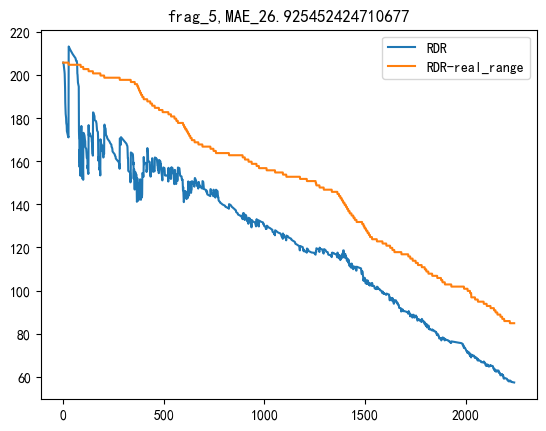

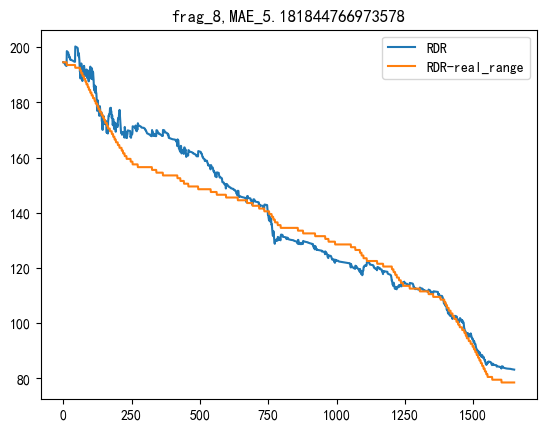

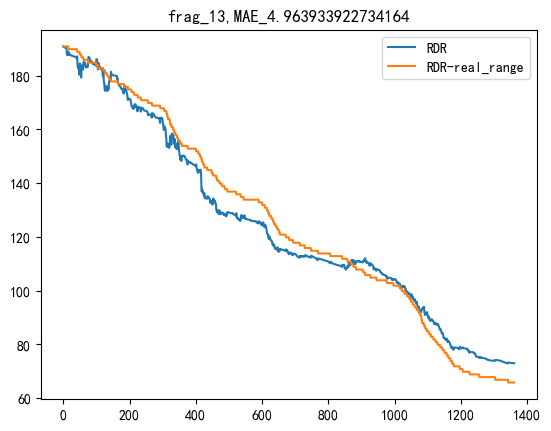

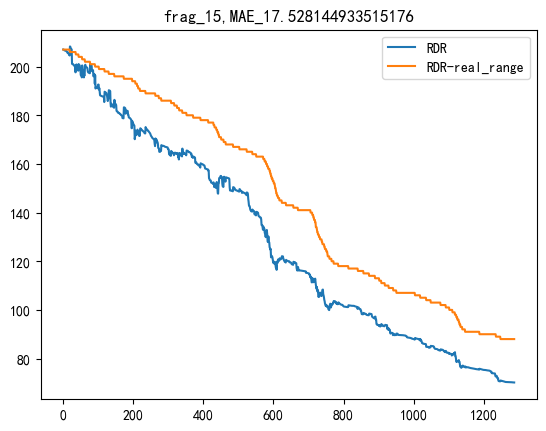

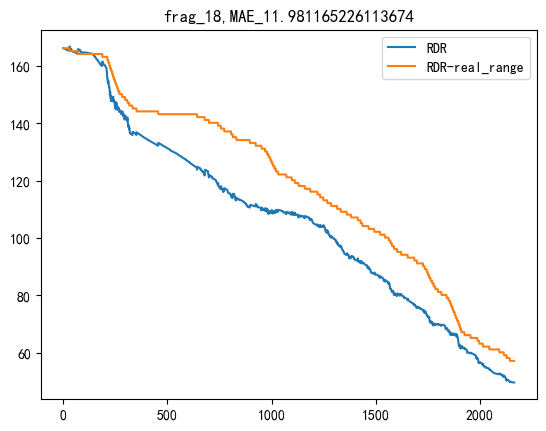

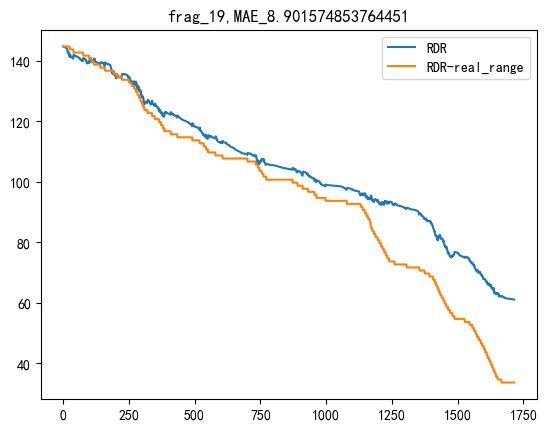

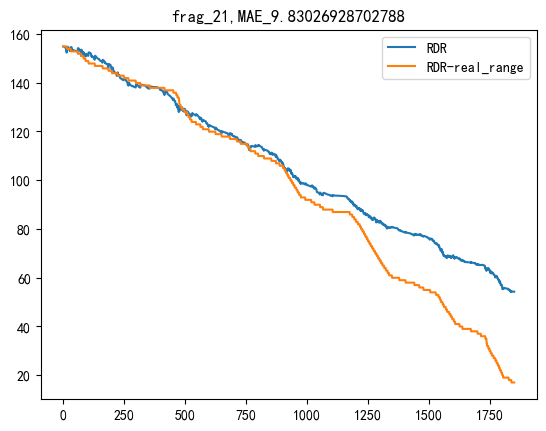

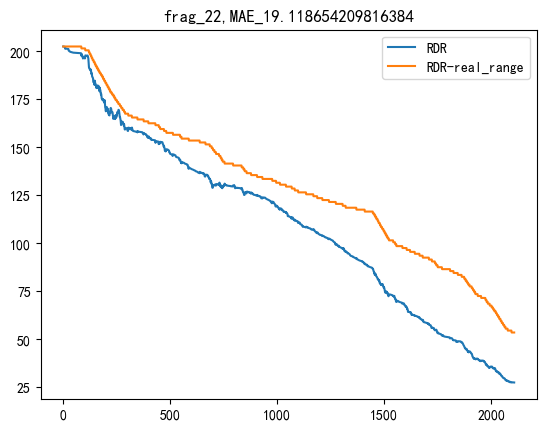

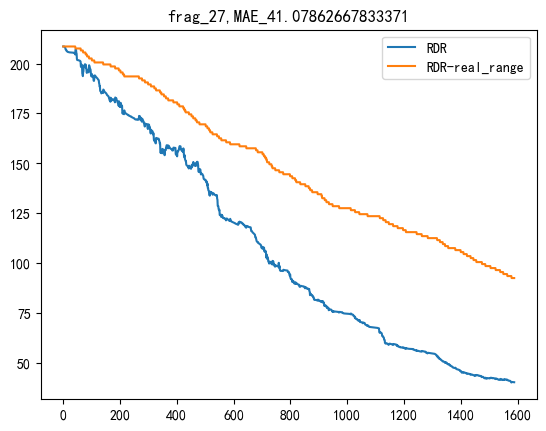

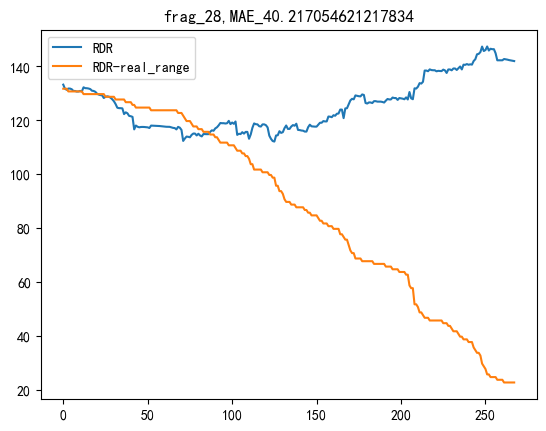

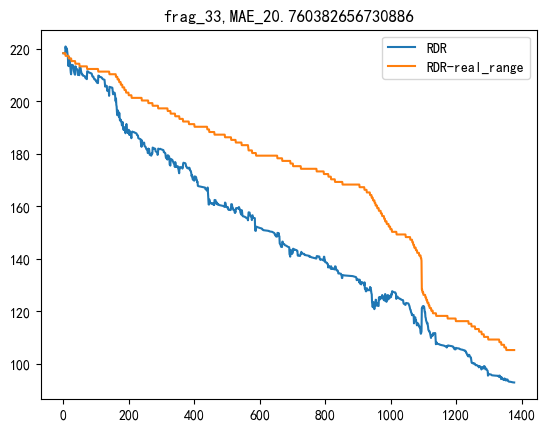

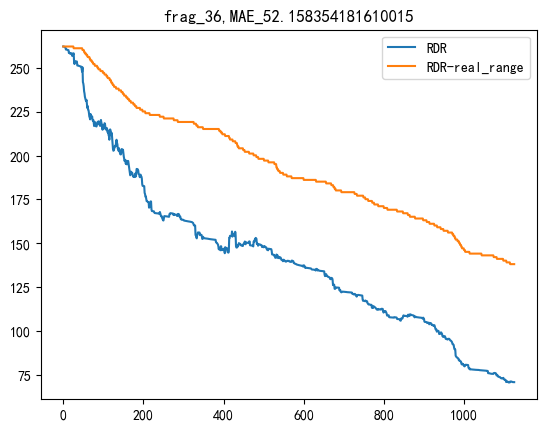

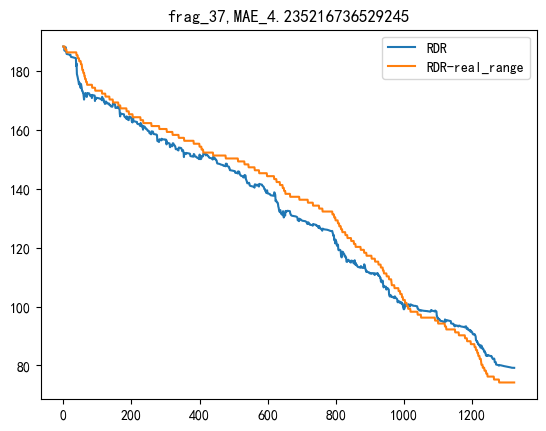

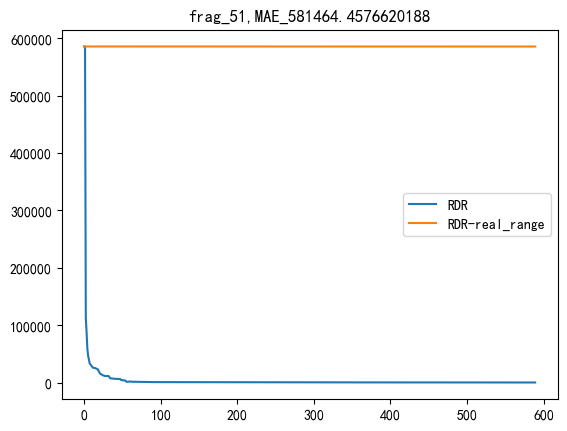

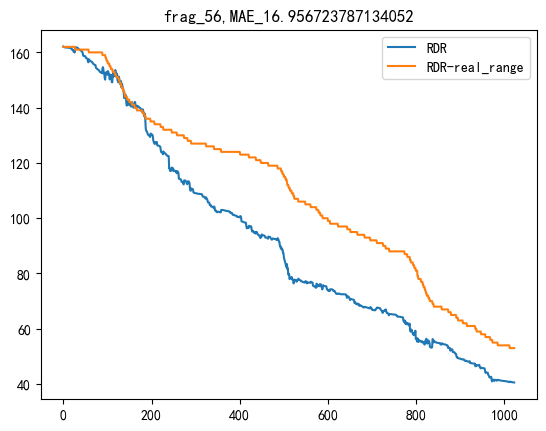

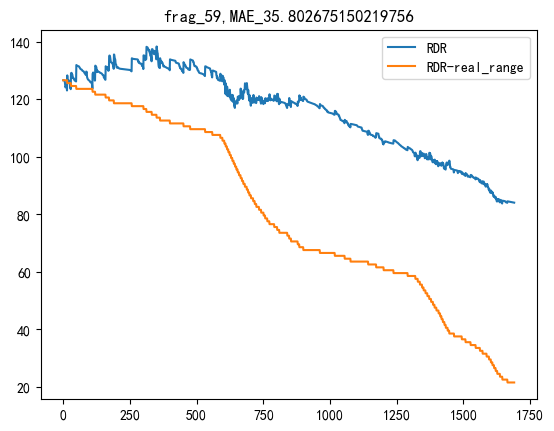

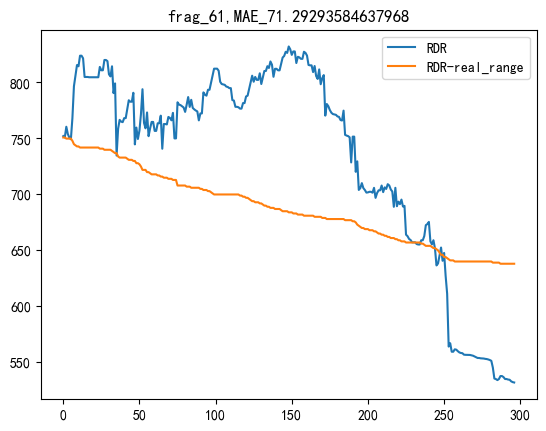

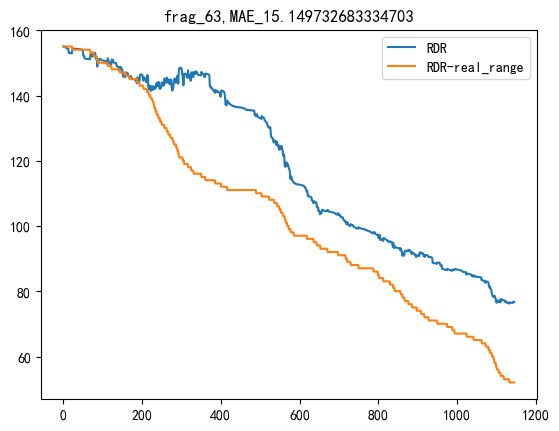

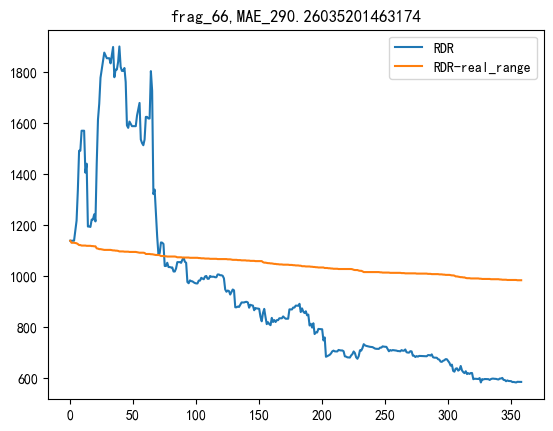

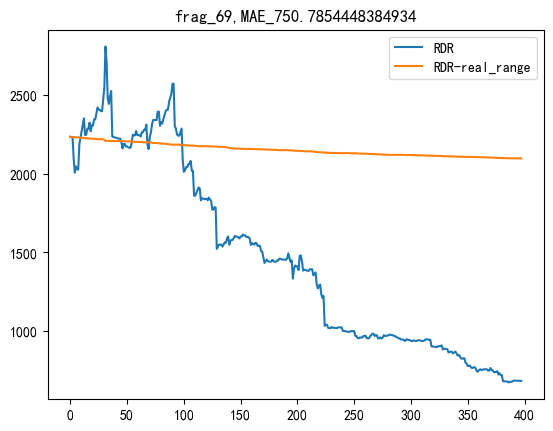

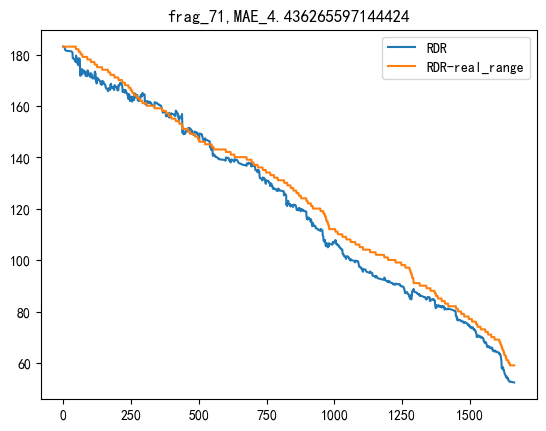

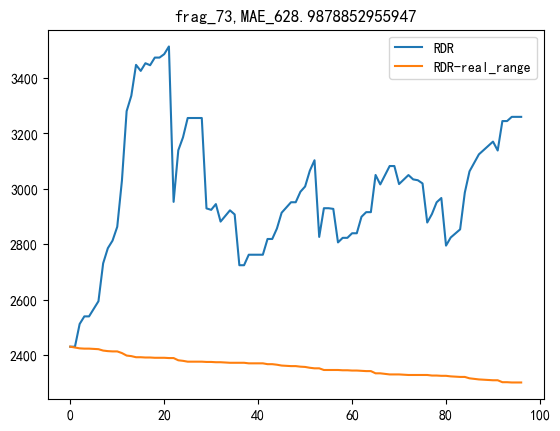

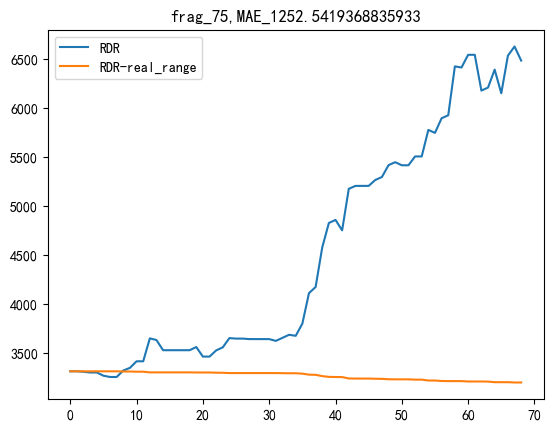

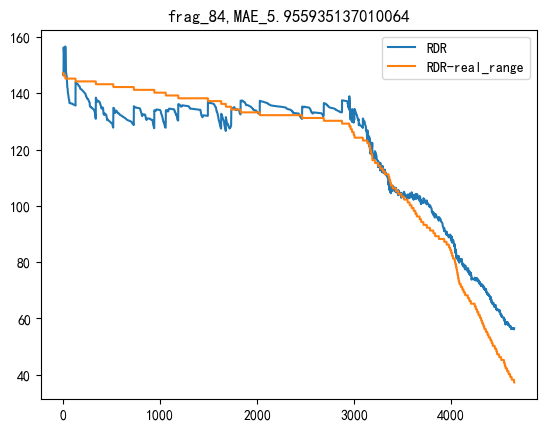

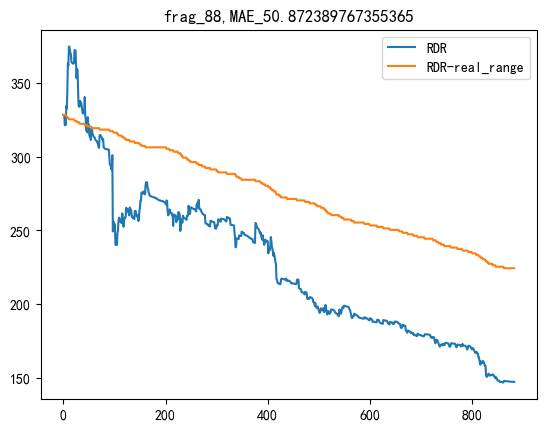

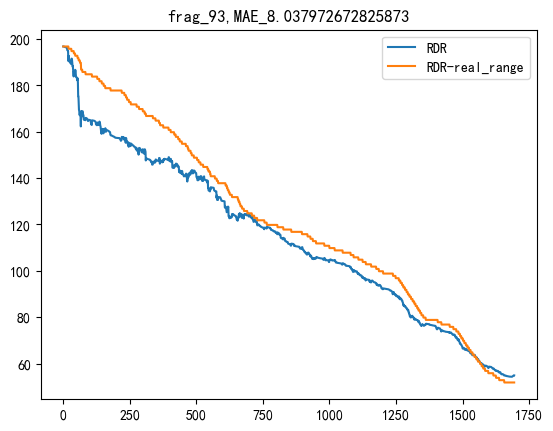

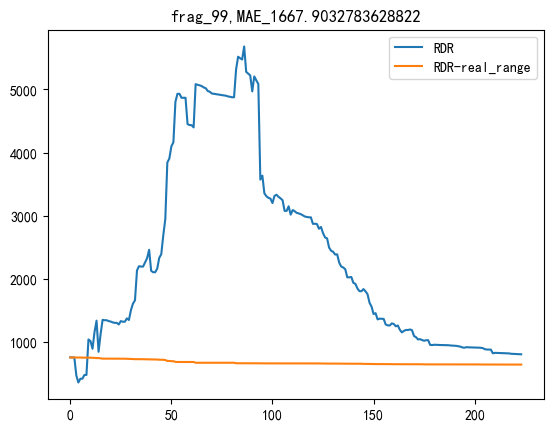

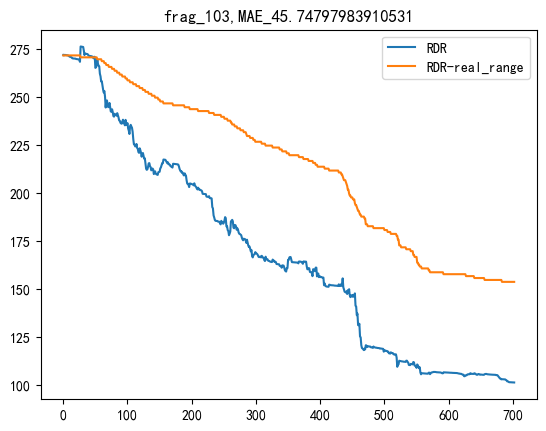

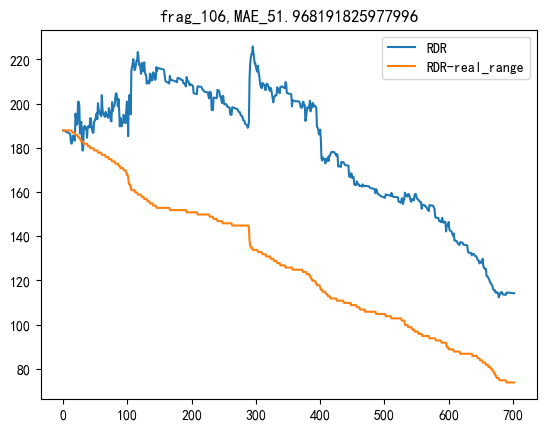

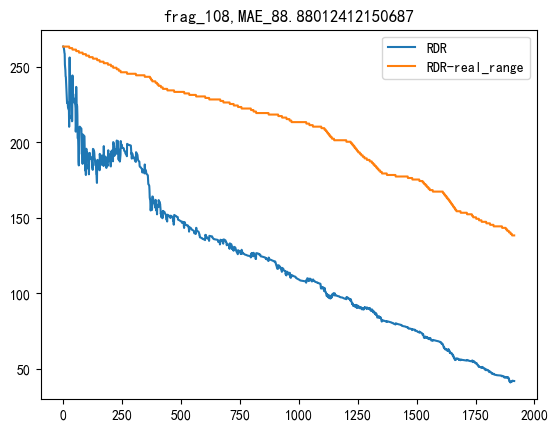

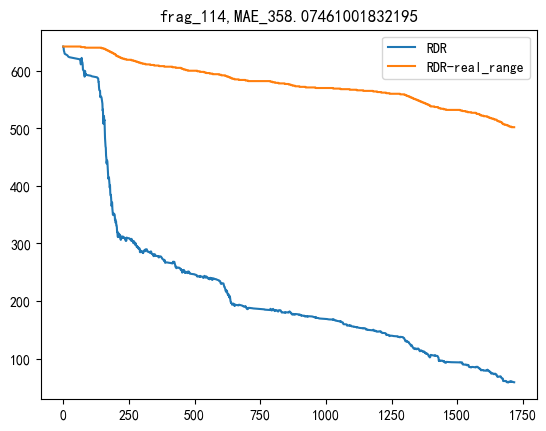

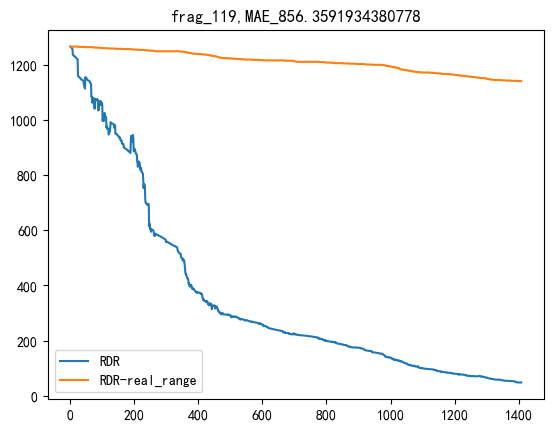

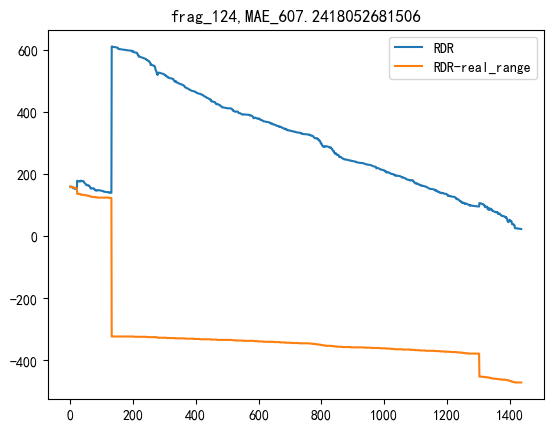

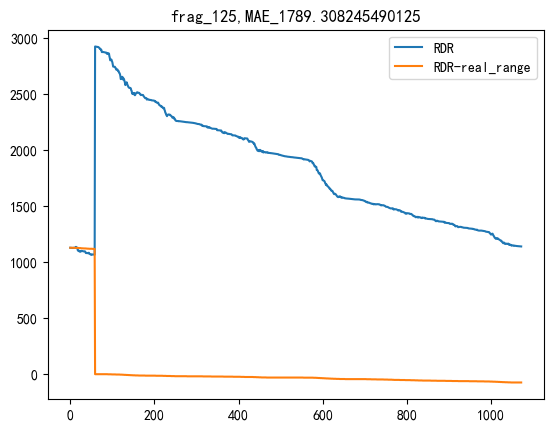

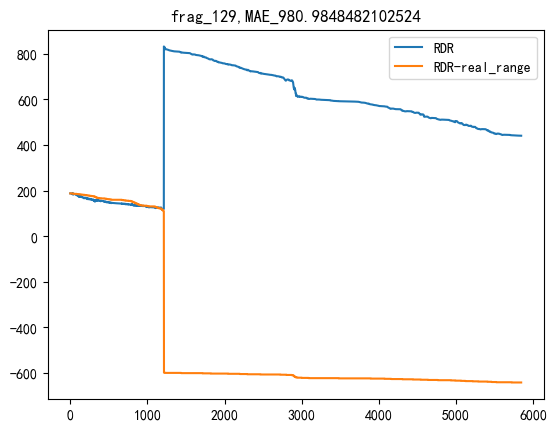

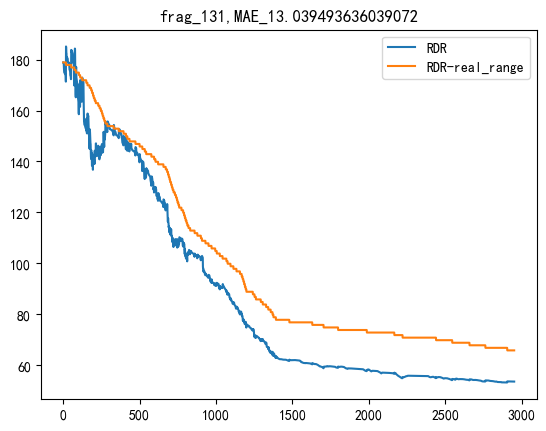

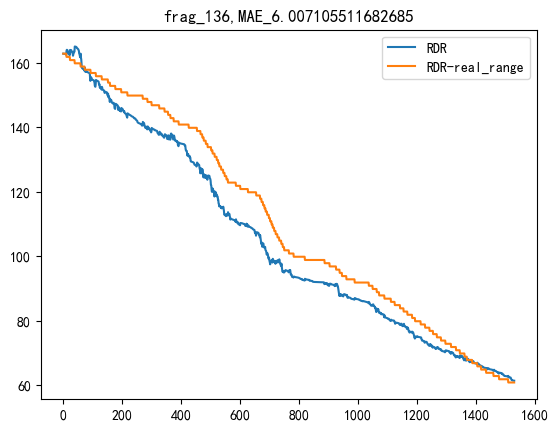

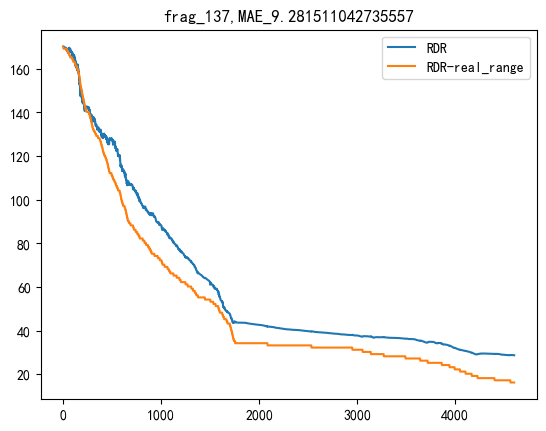

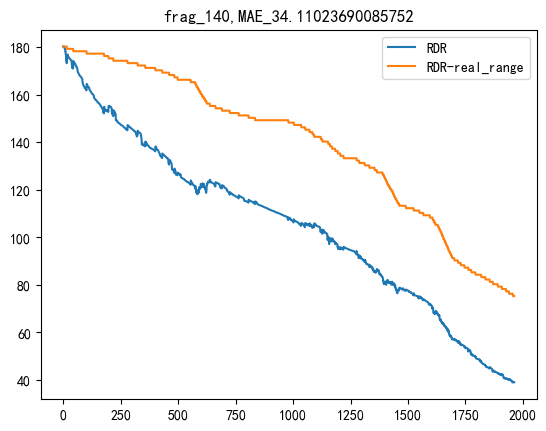

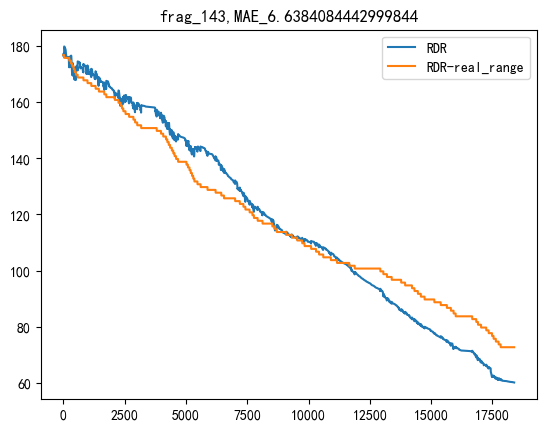

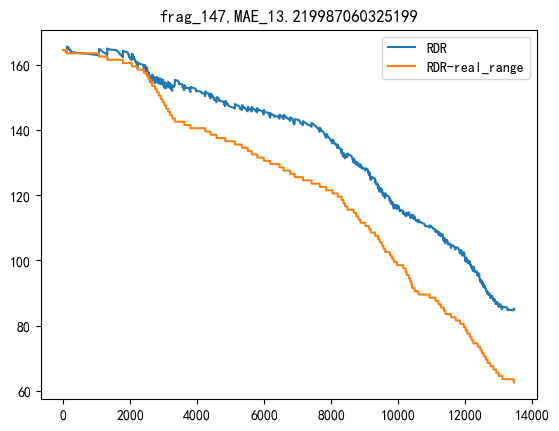

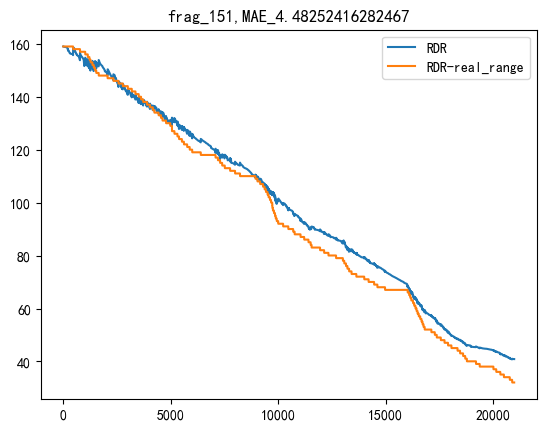

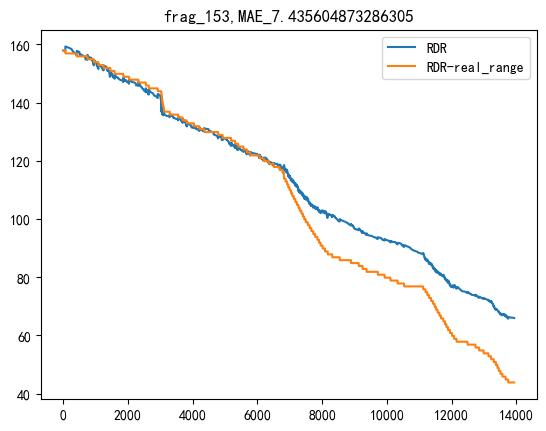

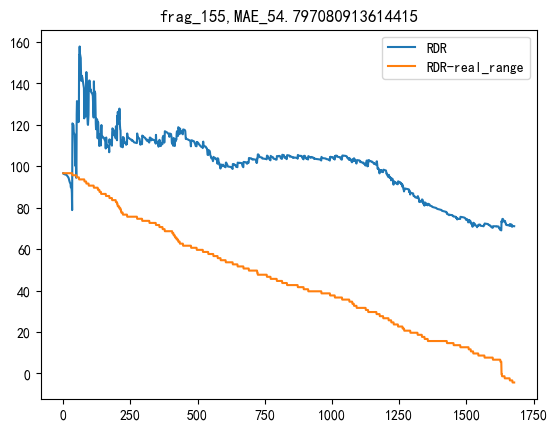

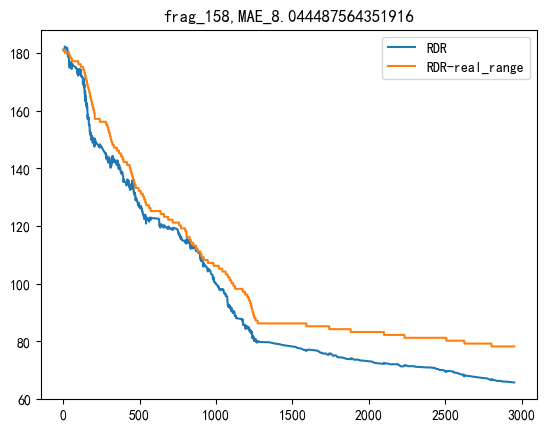

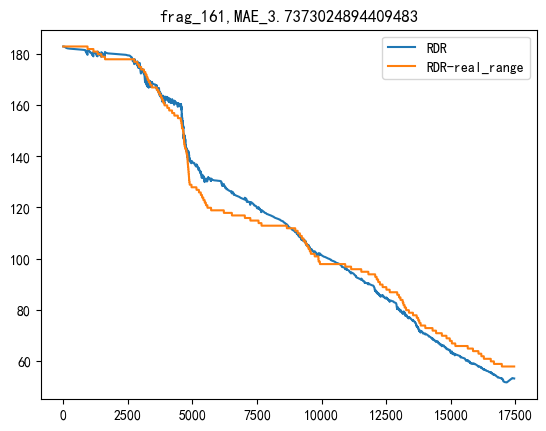

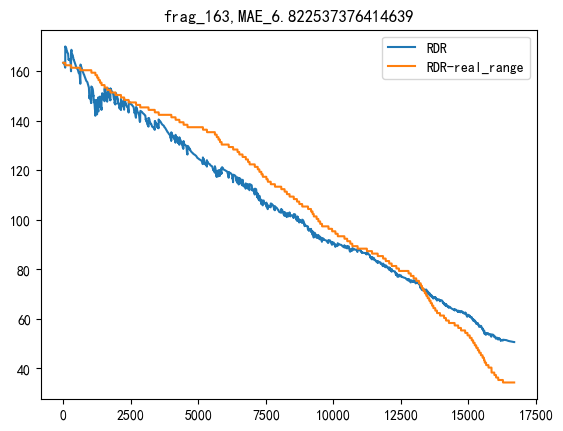

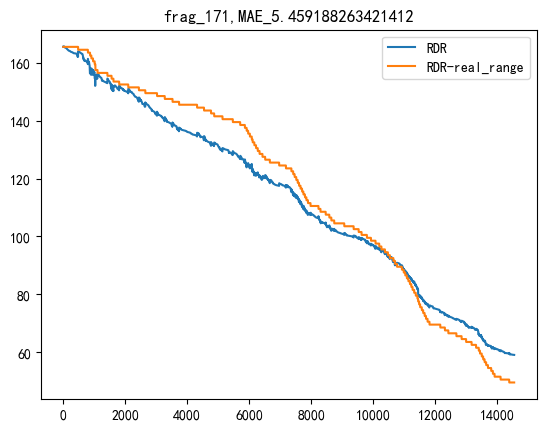

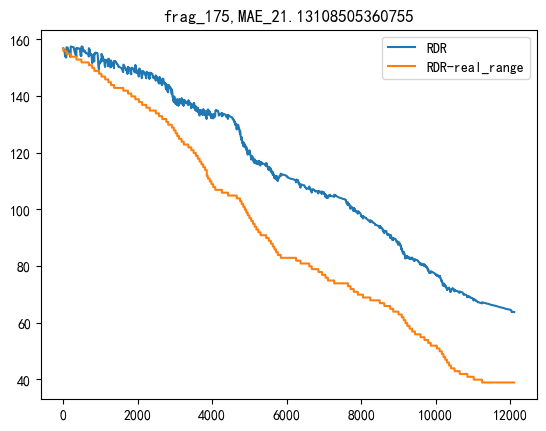

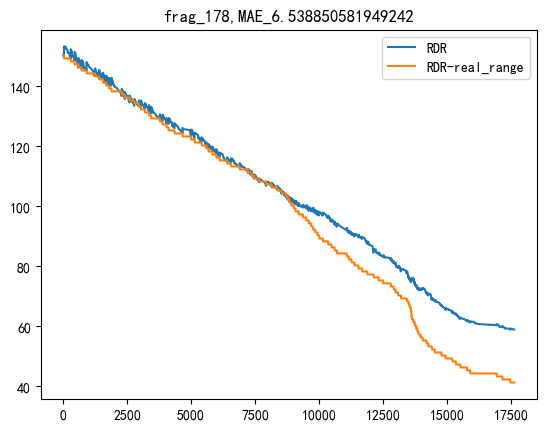

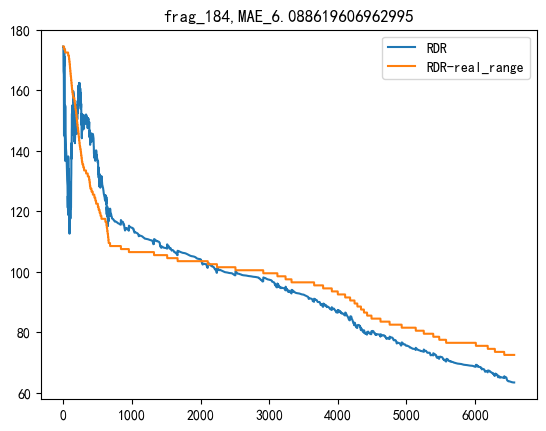

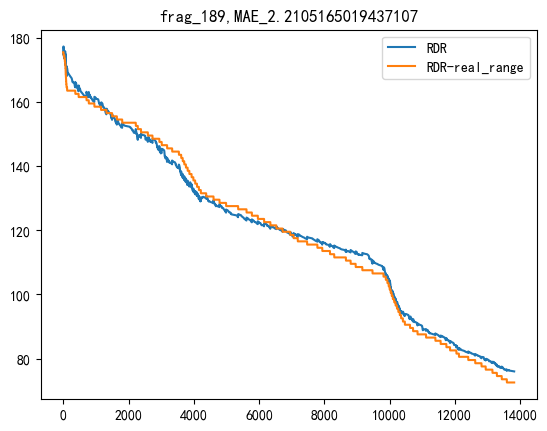

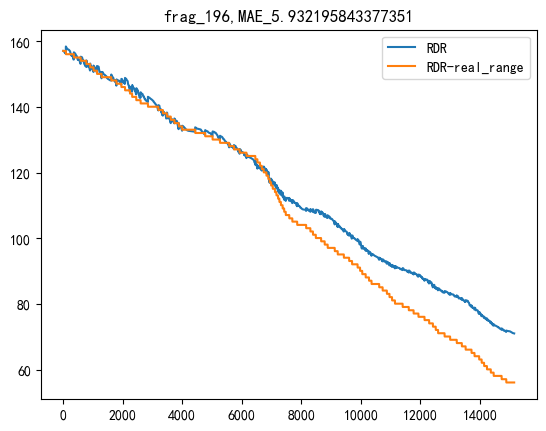

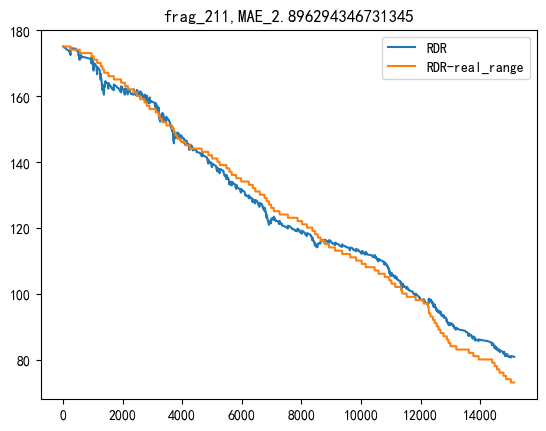

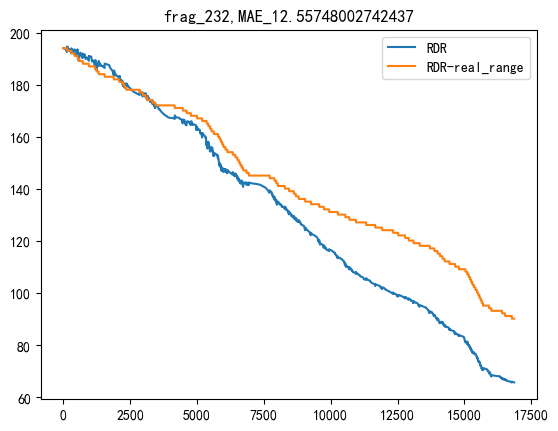

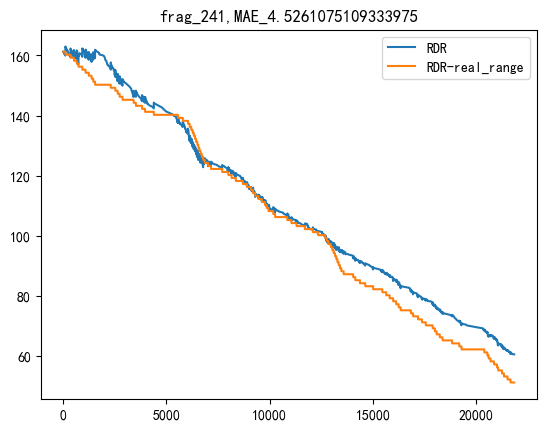

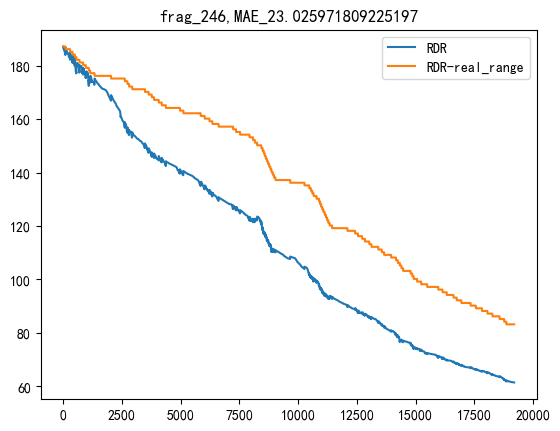

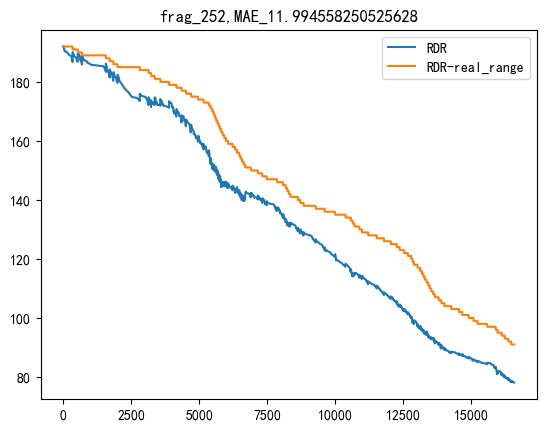

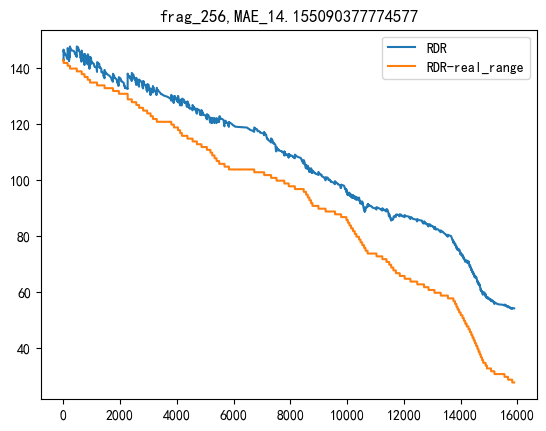

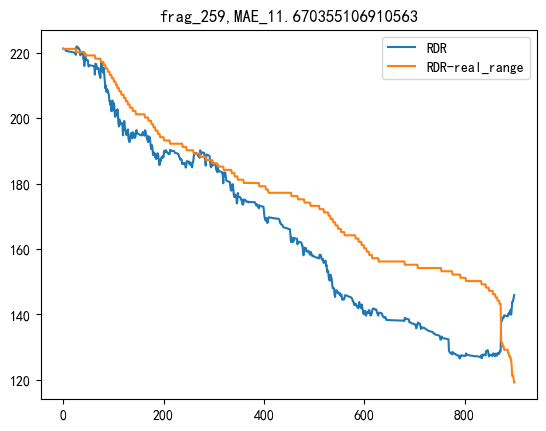

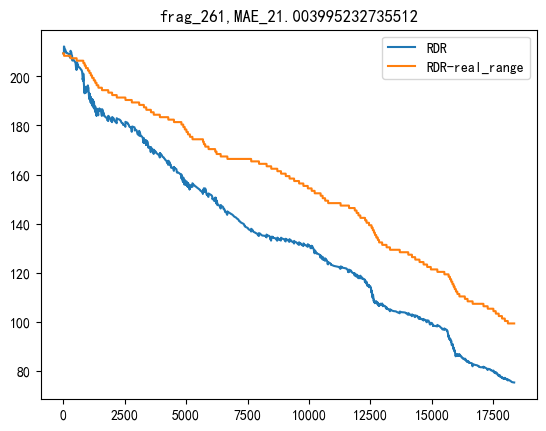

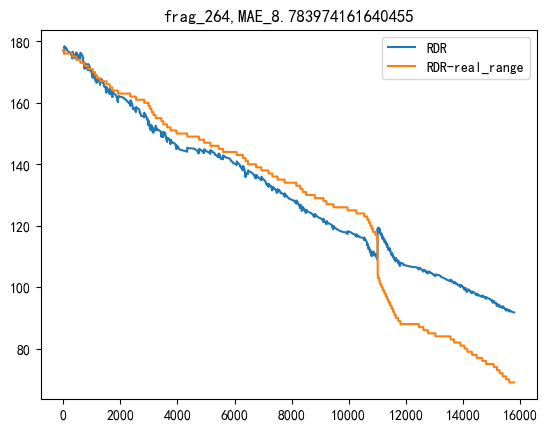

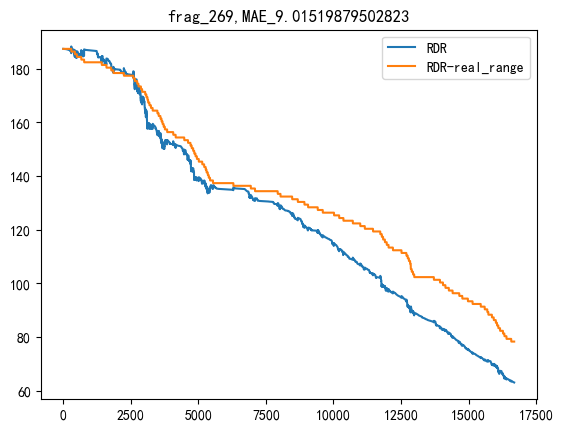

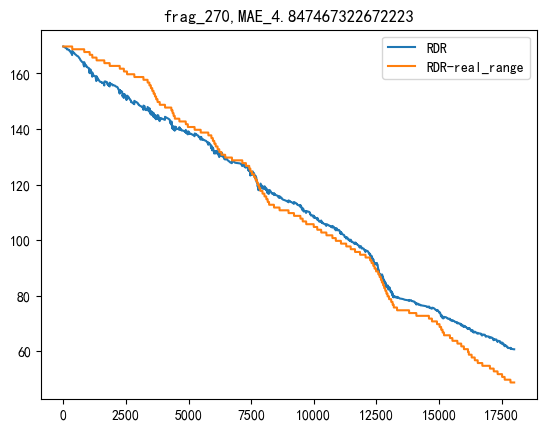

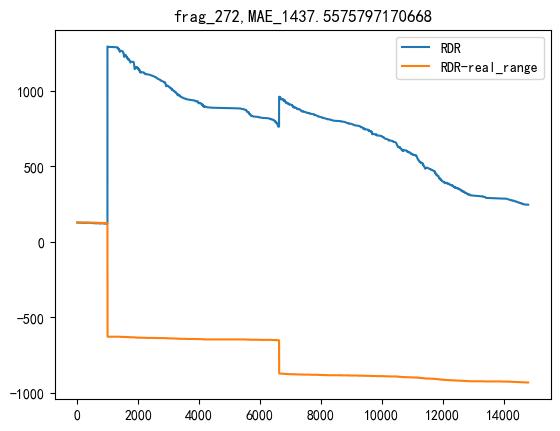

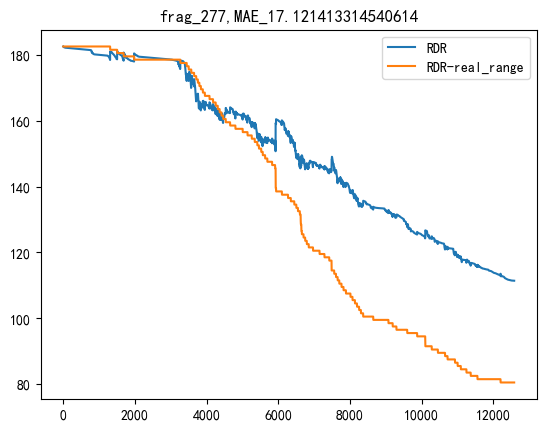

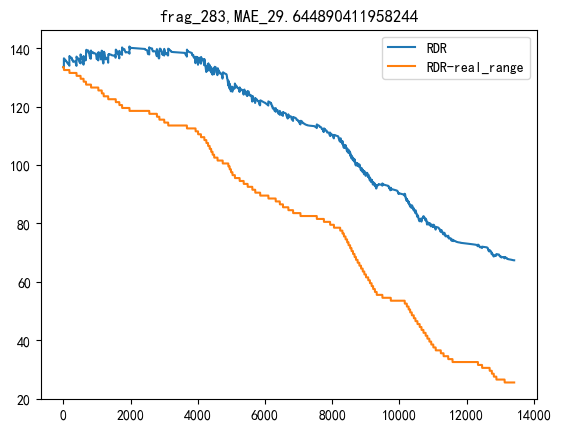

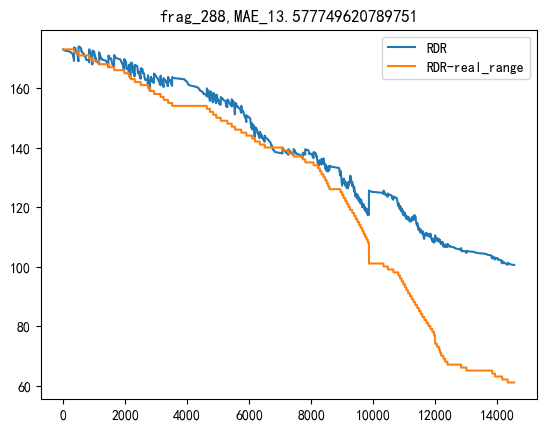

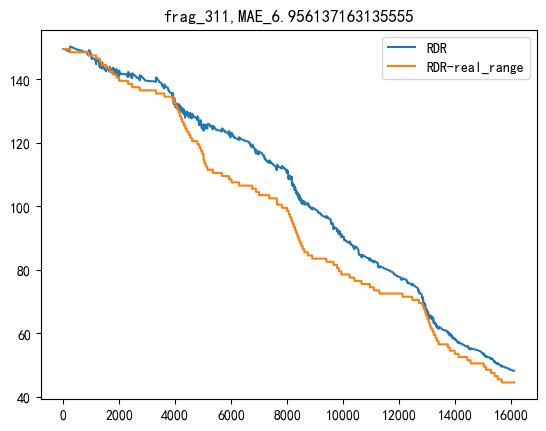

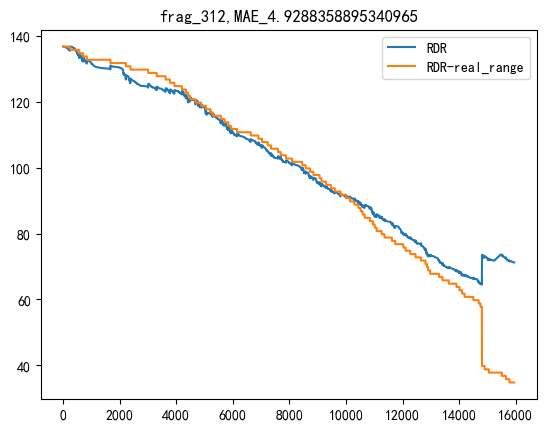

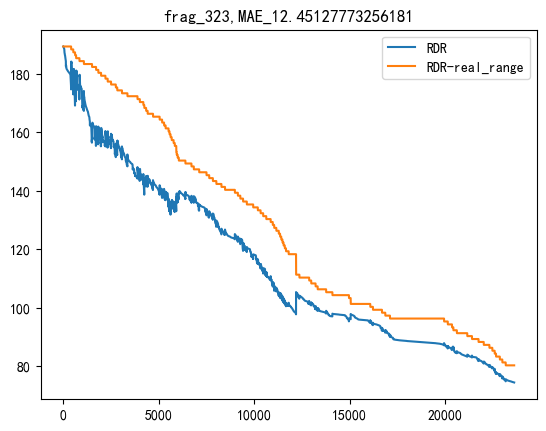

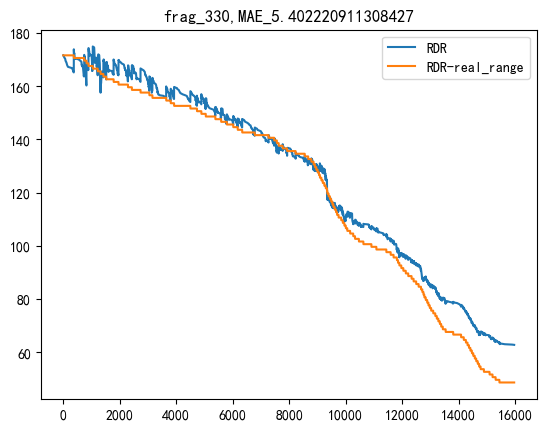

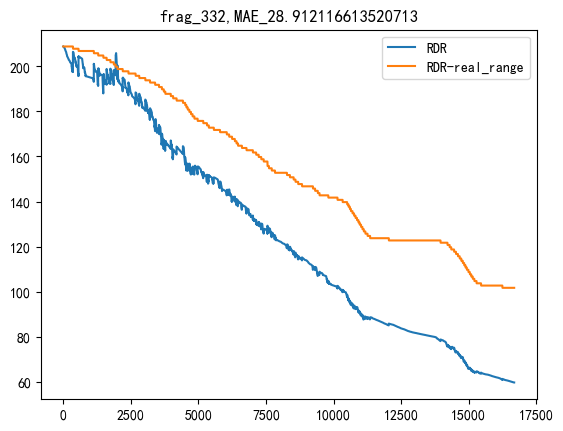

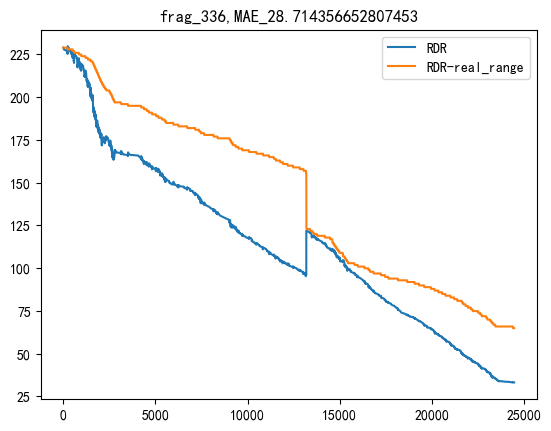

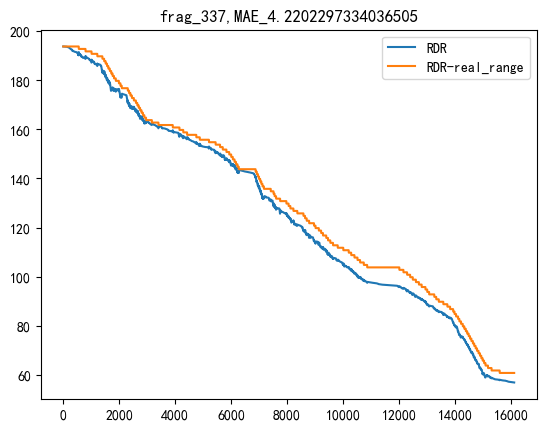

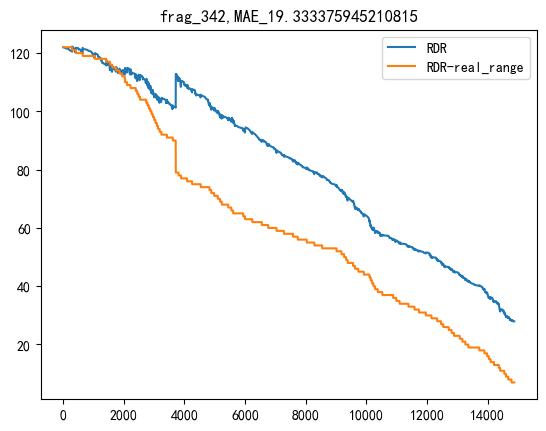

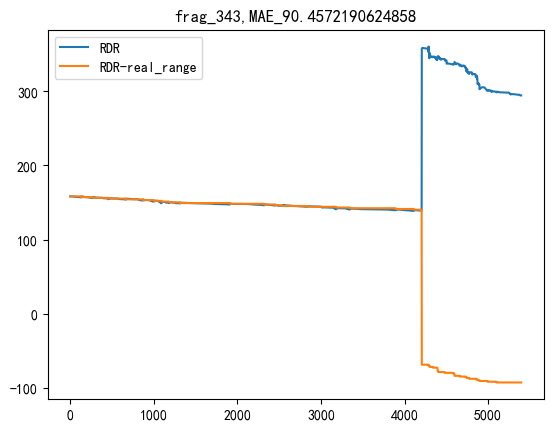

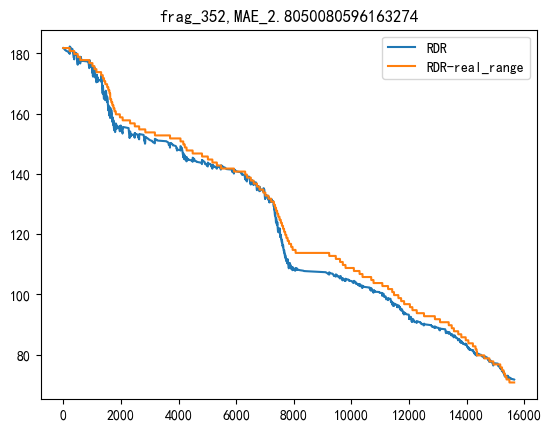

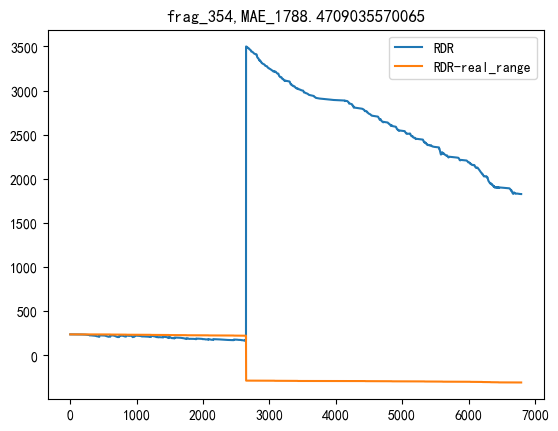

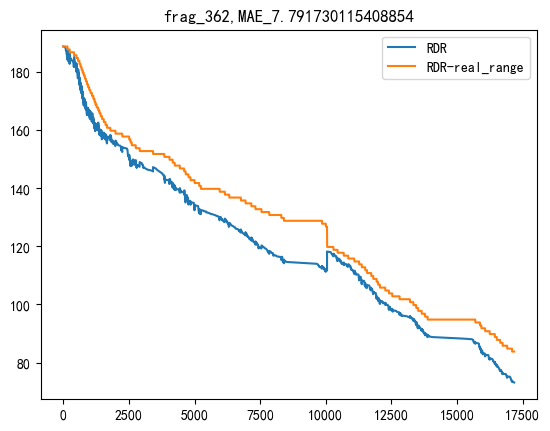

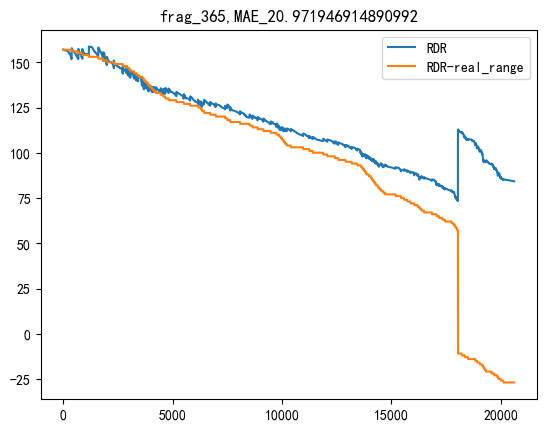

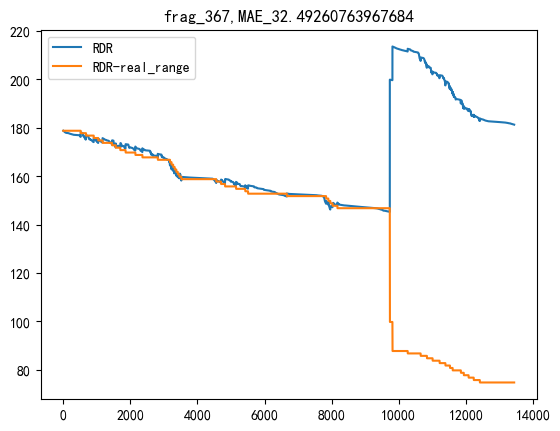

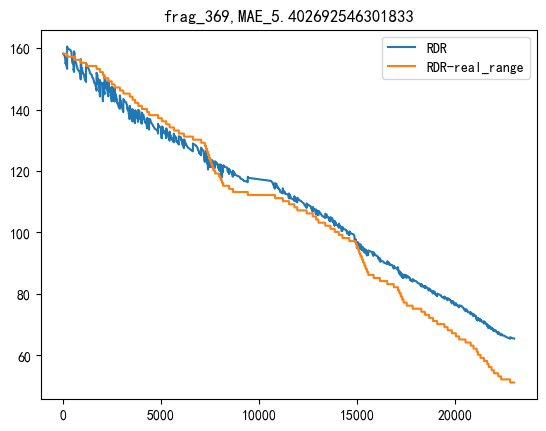

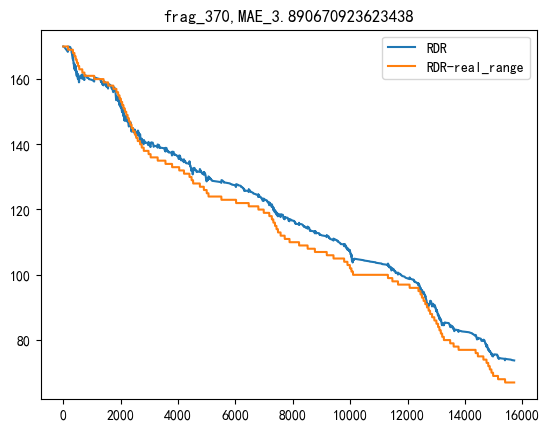

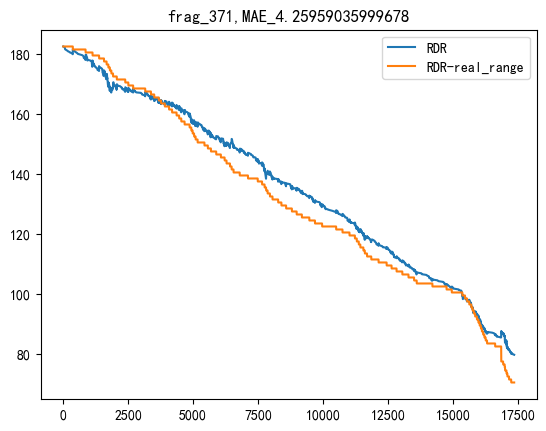

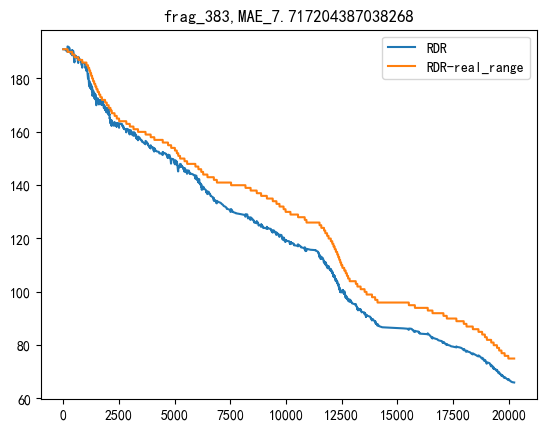

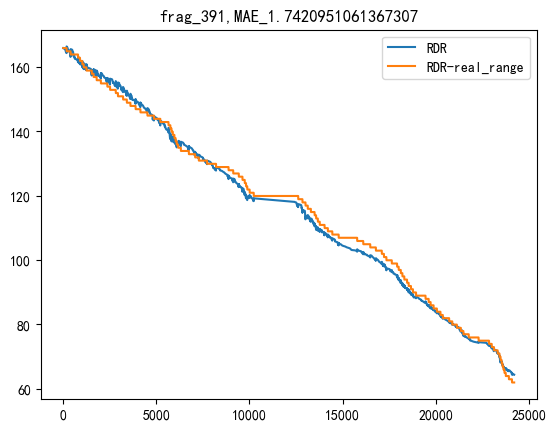

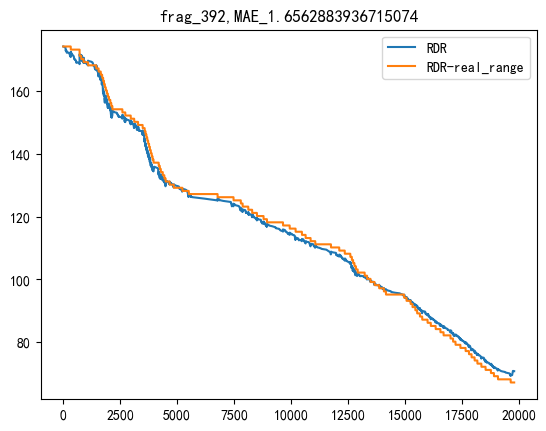

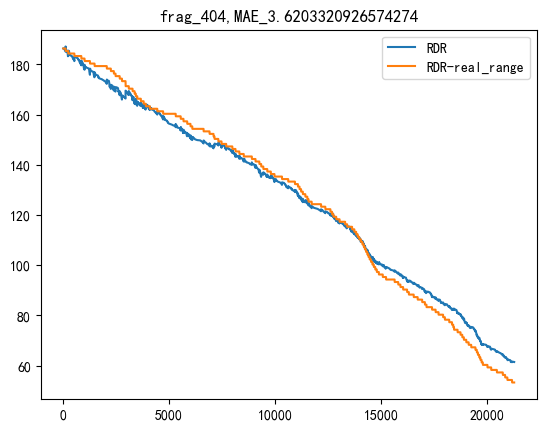

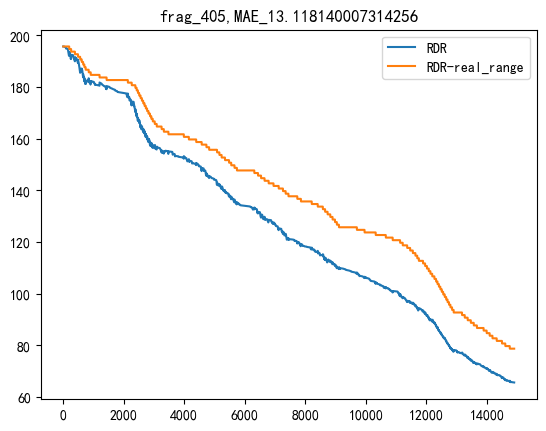

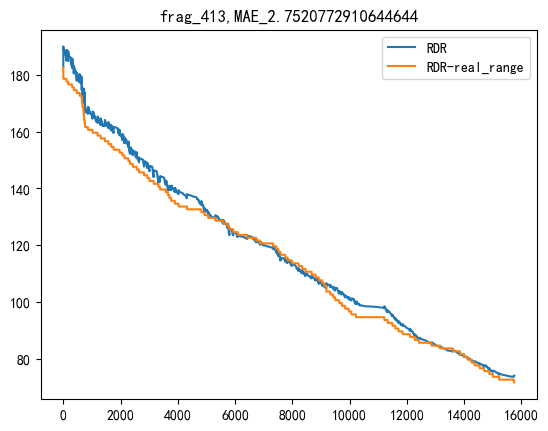

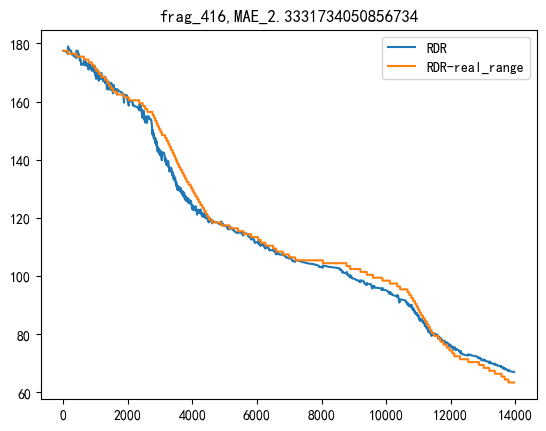

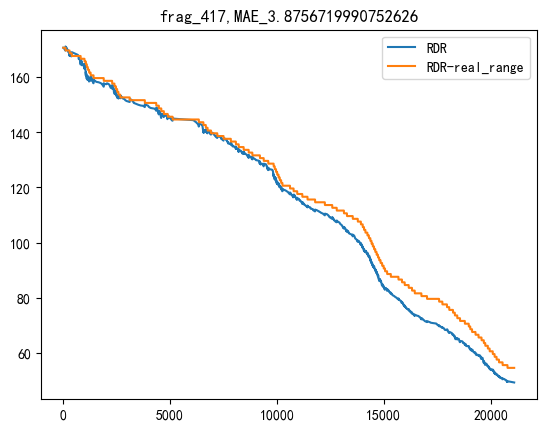

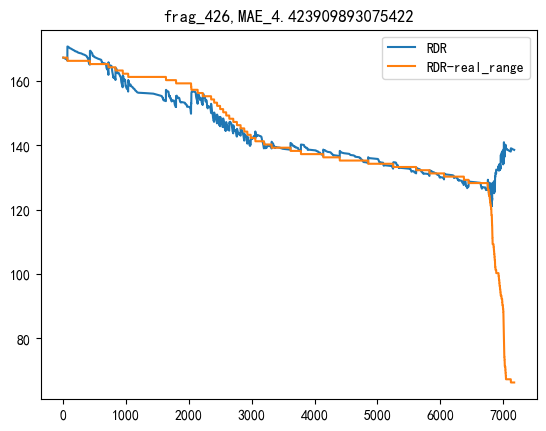

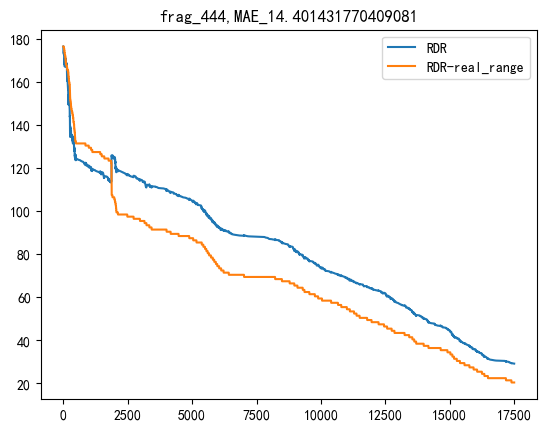

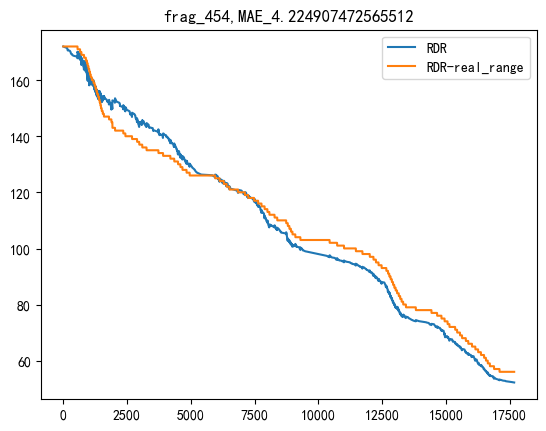

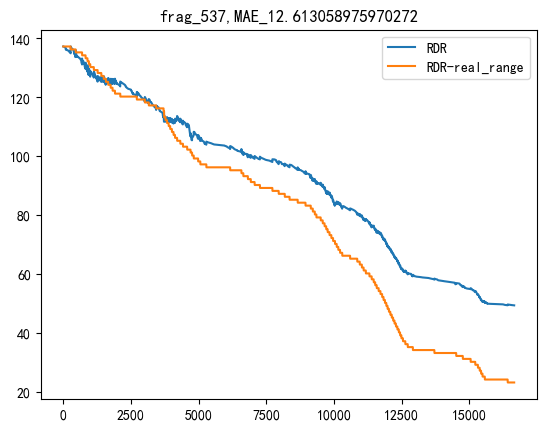

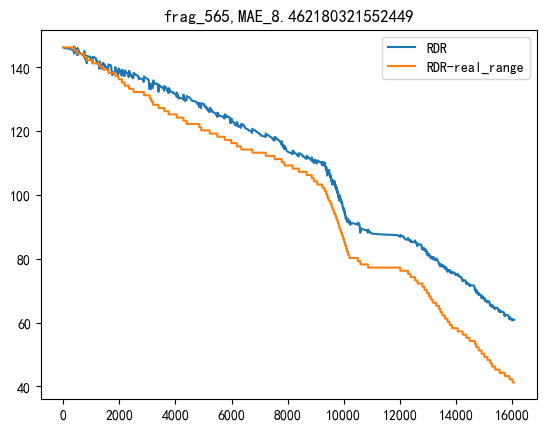

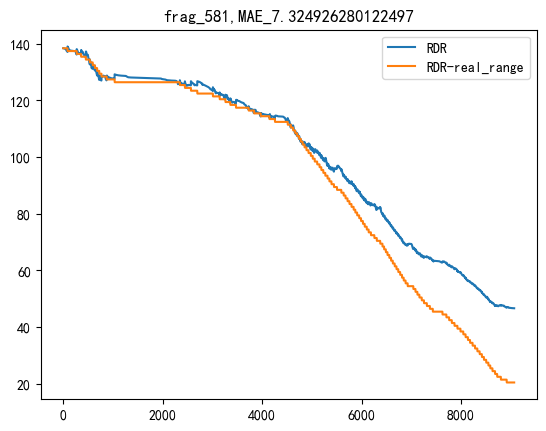

In [51]:
for x in useful_frag:
    out_put_i=cal_RDR(i=x)

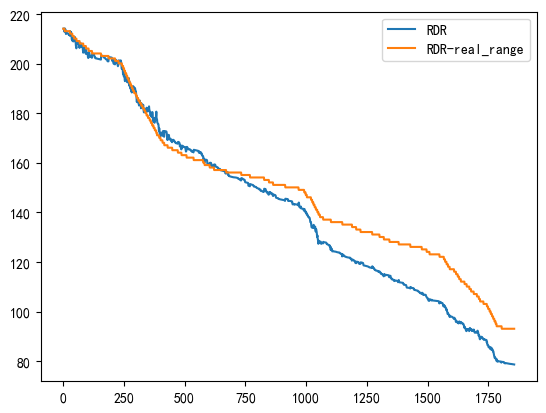可能是能耗估计过大